In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath(".."))
from scripts.play_store_scraper import BankReviewScraper
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from nltk.corpus import stopwords

In [5]:
bank = 'BOA'
app_id = 'com.boa.boaMobileBanking'

raw_path = '../data/raw/BOA_raw_reviews.csv'

In [6]:
scraper = BankReviewScraper(app_id, bank)
df = scraper.fetch_reviews(450)
print(len(df))
df.head()

450


,review,rating,date,bank,source
0,the worst app humans ever created,1,2025-06-09 16:27:28,BOA,Google Play
1,it's not working,3,2025-06-05 11:57:36,BOA,Google Play
2,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03 16:21:34,BOA,Google Play
3,exceptional,5,2025-06-03 10:32:35,BOA,Google Play
4,BoA Mobile good bank,5,2025-06-02 14:25:12,BOA,Google Play


In [8]:
# Save raw data
os.makedirs('../data/raw', exist_ok=True)
df.to_csv(raw_path, index=False)

In [9]:
df.dropna()
df.drop_duplicates()

,review,rating,date,bank,source
0,it's not working,3,2025-06-05 11:57:36,BOA,Google Play
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03 16:21:34,BOA,Google Play
2,exceptional,5,2025-06-03 10:32:35,BOA,Google Play
3,BoA Mobile good bank,5,2025-06-02 14:25:12,BOA,Google Play
4,this is worest app 24/7 loading,1,2025-06-01 15:51:10,BOA,Google Play
...,...,...,...,...,...
445,"the app used to run fine, but now it takes lik...",1,2024-06-27 23:33:38,BOA,Google Play
446,the underrated app I've ever seen and ur banki...,1,2024-06-27 21:27:52,BOA,Google Play
447,It demands to disable developer option.,1,2024-06-27 19:09:58,BOA,Google Play
448,"It's been two months now, I cannot do any tran...",1,2024-06-26 18:45:58,BOA,Google Play


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   review  450 non-null    object        
 1   rating  450 non-null    int64         
 2   date    450 non-null    datetime64[ns]
 3   bank    450 non-null    object        
 4   source  450 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 17.7+ KB


In [16]:
df.value_counts('rating')

rating
5    197
1    189
3     33
4     18
2     13
Name: count, dtype: int64

In [7]:
print(df['rating'].mean())

3.037777777777778


In [8]:
#for consistent result
DetectorFactory.seed = 0

In [9]:
def detect_language(review):
    try:
        return detect(review)
    except LangDetectException:
        return "error"

In [10]:
df['language'] = df['review'].apply(detect_language)

In [11]:
df_clean = df[df['language'] == 'en'].drop(columns='language')

In [12]:
# filtered data by language
df_clean.tail(2)

,review,rating,date,bank,source
448,It demands to disable developer option.,1,2024-06-27 19:09:58,BOA,Google Play
449,"It's been two months now, I cannot do any tran...",1,2024-06-26 18:45:58,BOA,Google Play


In [13]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   review  279 non-null    object        
 1   rating  279 non-null    int64         
 2   date    279 non-null    datetime64[ns]
 3   bank    279 non-null    object        
 4   source  279 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 13.1+ KB
None


In [14]:
df_clean.count()

review    279
rating    279
date      279
bank      279
source    279
dtype: int64

In [15]:
df_clean.isnull().sum()

review    0
rating    0
date      0
bank      0
source    0
dtype: int64

In [16]:
df_clean.shape

(279, 5)

In [17]:
df_clean.to_csv('cleaned_data.csv', index=False)

In [18]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
# Function to classify sentiment
def get_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [20]:
df_clean['review'] = df_clean['review'].astype(str)

In [21]:
df_clean['sentiment_score'] = df_clean['review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_clean['sentiment'] = df_clean['sentiment_score'].apply(get_sentiment)

In [22]:
df_clean

,review,rating,date,bank,source,sentiment_score,sentiment
0,the worst app humans ever created,1,2025-06-09 16:27:28,BOA,Google Play,-0.4767,Negative
2,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03 16:21:34,BOA,Google Play,-0.1884,Negative
5,this is worest app 24/7 loading,1,2025-06-01 15:51:10,BOA,Google Play,0.0000,Neutral
6,This App is not interest for Android phone Ple...,1,2025-06-01 10:17:10,BOA,Google Play,-0.0464,Neutral
7,BoA system is confartable,5,2025-06-01 00:47:32,BOA,Google Play,0.0000,Neutral
...,...,...,...,...,...,...,...
444,This app doesn't work,1,2024-06-30 13:39:50,BOA,Google Play,0.0000,Neutral
446,"the app used to run fine, but now it takes lik...",1,2024-06-27 23:33:38,BOA,Google Play,0.5647,Positive
447,the underrated app I've ever seen and ur banki...,1,2024-06-27 21:27:52,BOA,Google Play,0.0000,Neutral
448,It demands to disable developer option.,1,2024-06-27 19:09:58,BOA,Google Play,0.0000,Neutral


In [23]:
sentiment_counts = df_clean['sentiment'].value_counts()

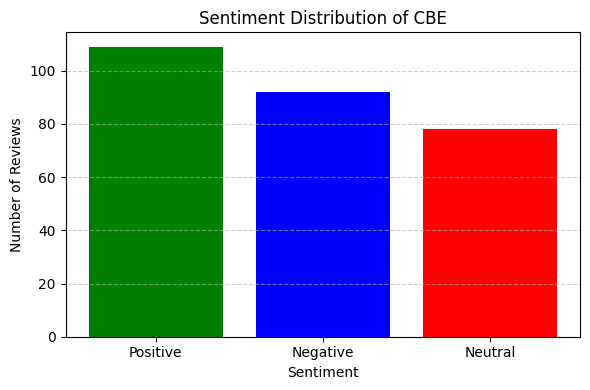

In [24]:
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution of CBE')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()